<a href="https://colab.research.google.com/github/marcmec/PrognosticSepsis/blob/main/Visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import io 
from google.colab import files 
import csv
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from math import e
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import plotly.express as px
from sklearn.preprocessing import StandardScaler


In [ ]:
upFiles = files.upload()

Saving apacheMaisAdmitTime.csv to apacheMaisAdmitTime.csv


In [3]:
pd.set_option('display.max_rows', None)


In [4]:
apacheAdmit = pd.read_csv('apacheMaisAdmitTime.csv')

In [ ]:
print(apacheAdmit)

In [5]:
apacheAdmit = apacheAdmit.replace(to_replace = ['ALIVE','EXPIRED'],value = ['1','0'])

In [6]:
apacheAdmit = apacheAdmit.replace(to_replace = ['Male','Female'],value = ['1','0'])

In [ ]:
print(apacheAdmit)

In [7]:
txLogit = -32.6659 + np.log(apacheAdmit['acutephysiologyscore'] +20.5958)*7.3068

In [8]:
txMortality= e**txLogit/(1+e**txLogit)

In [ ]:
print(txMortality)

In [9]:
apacheAdmit.insert(7,'txMortality',txMortality)

In [ ]:
print(apacheAdmit)

In [ ]:
apacheAdmit.to_csv('apacheAdmitTxMortalitySepsis.csv')

In [10]:
X = apacheAdmit[['hospitaldischargeoffset','txMortality']]
y = apacheAdmit["actualhospitalmortality"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

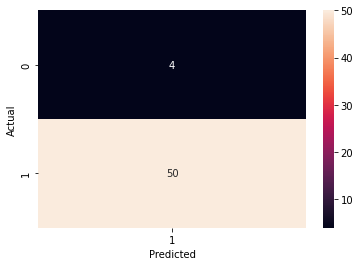

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9259259259259259


In [ ]:
teste = {'hospitaldischargeoffset':1000,'txMortality': 0.59}
dft = pd.DataFrame(data = teste,index=[0])
print(dft)
resultado = logistic_regression.predict(dft)
print(resultado)

   hospitaldischargeoffset  txMortality
0                     1000         0.59
['1']


In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = classifier.predict(X_test)

In [ ]:
teste = {'hospitaldischargeoffset':4000,'txMortality': 0.8}
dft = pd.DataFrame(data = teste,index=[0])
print(dft)
resultado = classifier.predict(dft)

In [ ]:
print(resultado)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [17]:
trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

In [ ]:
fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

In [19]:
accuracy = str(round(classifier.score(X_test,y_test) * 100, 2))+"%"


In [20]:
print(accuracy)

85.19%
